###**CODSOFT**

**Name: Keerthana N D**


**Batch: Sept Batch A6**


**Role: Data Science**


**TASK 5 : CREDIT CARD FRAUD DETECTION**

###*Importing Libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


###*Loading the data*

In [2]:
#read csv file
credit = pd.read_csv('/content/creditcard.csv')
credit

<ipython-input-2-221fadc99fb0>:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  credit = pd.read_csv('/content/creditcard.csv')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112978,72878,-0.760559,0.134733,1.449125,0.772003,-0.901165,0.044168,1.412660,-0.075483,-0.749272,...,0.026551,-0.381338,0.796182415271025,0.362986,-0.688207,0.103299,0.044479,0.171378,282.32,0.0
112979,72878,-2.617699,-1.308271,1.169065,0.863676,0.453336,-1.205048,0.746641,-0.381182,-0.201766,...,-0.465386,-0.359389,1.3411081969991,0.402229,-0.039798,0.299826,-0.068139,0.350012,124.92,0.0
112980,72878,-0.663649,0.382237,0.586369,-1.450981,-0.802590,-1.484491,0.073707,0.266853,-1.081694,...,0.319355,0.819814,-0.0277126913962194,0.730306,-0.289635,-0.347499,0.263921,0.155014,20.00,0.0
112981,72878,1.271910,-0.795829,1.006842,-0.528135,-1.486184,-0.200824,-1.032552,0.078426,-0.556756,...,-0.192441,0.029687,-0.0221096711226373,0.413052,0.177363,1.144201,-0.021856,0.009546,23.85,0.0


In [3]:
#display first five starting rows
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
#display last 5 rows
credit.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
112978,72878,-0.760559,0.134733,1.449125,0.772003,-0.901165,0.044168,1.412660,-0.075483,-0.749272,...,0.026551,-0.381338,0.796182415271025,0.362986,-0.688207,0.103299,0.044479,0.171378,282.32,0.0
112979,72878,-2.617699,-1.308271,1.169065,0.863676,0.453336,-1.205048,0.746641,-0.381182,-0.201766,...,-0.465386,-0.359389,1.3411081969991,0.402229,-0.039798,0.299826,-0.068139,0.350012,124.92,0.0
112980,72878,-0.663649,0.382237,0.586369,-1.450981,-0.802590,-1.484491,0.073707,0.266853,-1.081694,...,0.319355,0.819814,-0.0277126913962194,0.730306,-0.289635,-0.347499,0.263921,0.155014,20.00,0.0
112981,72878,1.271910,-0.795829,1.006842,-0.528135,-1.486184,-0.200824,-1.032552,0.078426,-0.556756,...,-0.192441,0.029687,-0.0221096711226373,0.413052,0.177363,1.144201,-0.021856,0.009546,23.85,0.0
112982,72879,1.243688,0.163305,-1.363472,0.306216,2.251503,3.503915,-0.549425,0.909979,0.310537,...,-0.376100,-1.042378,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#describe the data
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V24,V25,V26,V27,V28,Amount,Class
count,112983.000000,112983.000000,112983.000000,112983.000000,112983.000000,112983.000000,112983.000000,112983.000000,112983.000000,112983.000000,...,112983.000000,112983.000000,112983.000000,112982.000000,112982.000000,112982.000000,112982.000000,112982.000000,112982.000000,112982.000000
mean,45605.298452,-0.255786,-0.017552,0.680632,0.155668,-0.283972,0.094067,-0.115067,0.059102,-0.065239,...,0.042917,-0.033300,-0.110538,0.011010,0.132531,0.026702,0.001181,0.002032,95.317461,0.002133
std,18301.896908,1.845384,1.639495,1.304647,1.339034,1.339017,1.296306,1.199229,1.228404,1.102994,...,0.748110,0.737532,0.638890,0.595327,0.439274,0.491096,0.391378,0.318130,258.284389,0.046136
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-21.024817,-34.830382,-10.933144,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,34916.500000,-1.022374,-0.590931,0.175610,-0.708109,-0.905394,-0.650179,-0.603802,-0.134250,-0.700746,...,-0.168259,-0.224898,-0.538444,-0.323889,-0.131651,-0.323106,-0.060942,-0.004845,6.990000,0.000000
50%,47451.000000,-0.261723,0.083810,0.755817,0.182412,-0.316988,-0.159483,-0.068344,0.077687,-0.131129,...,-0.024707,-0.057836,-0.087084,0.066965,0.170100,-0.066299,0.010610,0.023399,25.000000,0.000000
75%,60439.000000,1.155455,0.746683,1.378738,1.017483,0.243658,0.486405,0.411015,0.369059,0.523527,...,0.168717,0.118681,0.309598,0.408099,0.420490,0.293707,0.084657,0.077000,85.987500,0.000000
max,72879.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,39.420904,27.202839,10.503090,4.016342,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [6]:
#determine the dimension of df
credit.shape

(112983, 31)

In [7]:
#display columns
credit.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
#summary of the df
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112983 entries, 0 to 112982
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    112983 non-null  int64  
 1   V1      112983 non-null  float64
 2   V2      112983 non-null  float64
 3   V3      112983 non-null  float64
 4   V4      112983 non-null  float64
 5   V5      112983 non-null  float64
 6   V6      112983 non-null  float64
 7   V7      112983 non-null  float64
 8   V8      112983 non-null  float64
 9   V9      112983 non-null  float64
 10  V10     112983 non-null  float64
 11  V11     112983 non-null  float64
 12  V12     112983 non-null  float64
 13  V13     112983 non-null  float64
 14  V14     112983 non-null  float64
 15  V15     112983 non-null  float64
 16  V16     112983 non-null  float64
 17  V17     112983 non-null  float64
 18  V18     112983 non-null  float64
 19  V19     112983 non-null  float64
 20  V20     112983 non-null  float64
 21  V21     11

In [9]:
#datatypes of columns
credit.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23        object
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

###*Data Cleaning*

In [10]:
#missing null values
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [11]:
credit.dropna(inplace=True)

In [12]:
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
#counting the unique values
credit.Class.value_counts()

0.0    112741
1.0       241
Name: Class, dtype: int64

In [14]:
#drop duplicate
credit.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112977,72878,-0.809166,1.031274,0.896685,-1.010452,-0.158963,-1.222943,0.709998,0.156250,-0.708360,...,0.156289,0.267405,-0.0632985335549451,0.475577,-0.215705,0.806805,-0.112920,0.056709,30.89,0.0
112978,72878,-0.760559,0.134733,1.449125,0.772003,-0.901165,0.044168,1.412660,-0.075483,-0.749272,...,0.026551,-0.381338,0.796182415271025,0.362986,-0.688207,0.103299,0.044479,0.171378,282.32,0.0
112979,72878,-2.617699,-1.308271,1.169065,0.863676,0.453336,-1.205048,0.746641,-0.381182,-0.201766,...,-0.465386,-0.359389,1.3411081969991,0.402229,-0.039798,0.299826,-0.068139,0.350012,124.92,0.0
112980,72878,-0.663649,0.382237,0.586369,-1.450981,-0.802590,-1.484491,0.073707,0.266853,-1.081694,...,0.319355,0.819814,-0.0277126913962194,0.730306,-0.289635,-0.347499,0.263921,0.155014,20.00,0.0


###*Data Preprocessing*

In [15]:
#Imbalance in the Data
# Determine number of fraud cases in dataset
fraud = credit[credit['Class'] == 1]
valid = credit[credit['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(credit[credit['Class'] == 1])))
print('Valid Transactions: {}'.format(len(credit[credit['Class'] == 0])))


0.0021376429160642535
Fraud Cases: 241
Valid Transactions: 112741


In [16]:
#Print amount details for fraudulent transaction
print('Amount details for fraudulent transaction')
fraud.Amount.describe()

Amount details for fraudulent transaction


count     241.000000
mean      119.862531
std       254.773098
min         0.000000
25%         1.000000
50%         8.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [17]:
#Print amount details for Normal Transaction
print('Details of valid transaction')
valid.Amount.describe()

Details of valid transaction


count    112741.000000
mean         95.264993
std         258.290460
min           0.000000
25%           6.990000
50%          25.000000
75%          85.900000
max       19656.530000
Name: Amount, dtype: float64

###*Exploratory Data Analysis*

###*Correlation Matrix*

<ipython-input-18-d5335cb34795>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = credit.corr()


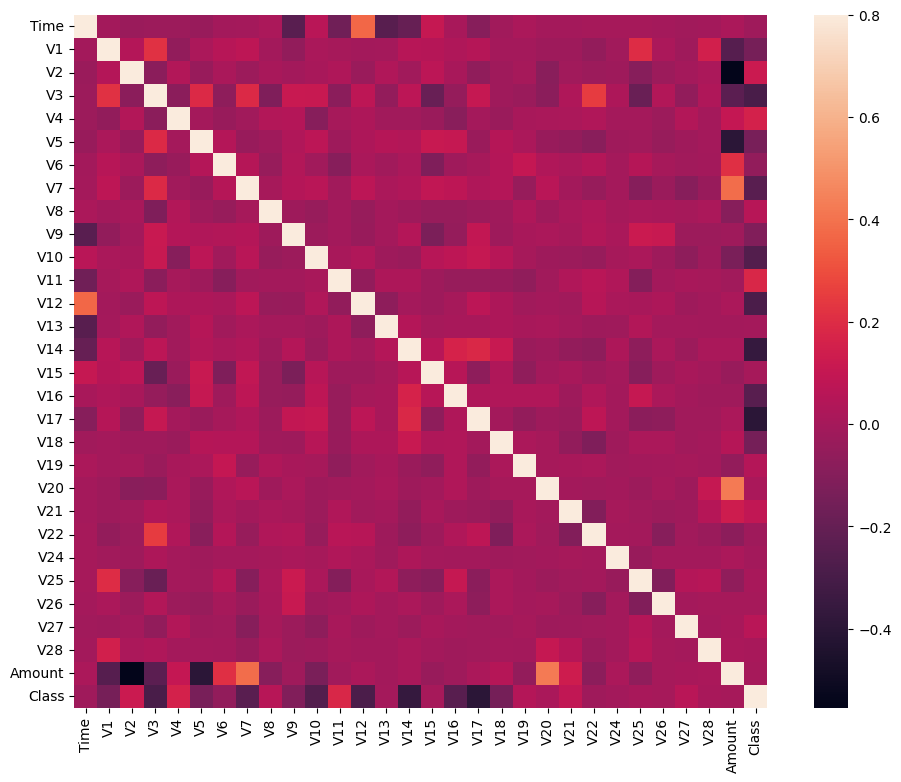

In [18]:
 #Plotting the Correlation Matrix
corr = credit.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corr, vmax = .8, square = True)
plt.show()

In [19]:
#checking correlation of 'dependent' variable with each "independent" variable
credit.corr()[['Class']].sort_values(by='Class')[:-1]

<ipython-input-19-d7c2cd0b6c69>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  credit.corr()[['Class']].sort_values(by='Class')[:-1]


,Class
V17,-0.397557
V14,-0.362791
V3,-0.294109
V12,-0.287750
V10,-0.259157
V16,-0.244450
V7,-0.239331
V18,-0.150448
V1,-0.142791
V5,-0.136652


###*Model training*

In [20]:
# displaydependent and independent variables
X = credit.iloc[:, :-1]
Y = credit.iloc[:, -1]

In [21]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [22]:
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Class, dtype: float64

In [23]:
#Train test splitting
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25, random_state=0)

In [24]:
#standard scaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [25]:
X_train.shape


(84736, 30)

In [26]:
X_test.shape

(28246, 30)

In [27]:
lr = LogisticRegression()

## fit on training data
lr.fit(X_train, Y_train)

LogisticRegression()

In [28]:
rc = RandomForestClassifier()
rc.fit(X_train, Y_train)

RandomForestClassifier()

##*Model Evaluation*

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00     28192
     Class 1       0.74      0.57      0.65        54

    accuracy                           1.00     28246
   macro avg       0.87      0.79      0.82     28246
weighted avg       1.00      1.00      1.00     28246

----------------------------------------------------------------------------------------------------

Precision: 0.7380952380952381
Recall: 0.5740740740740741
F1 Score: 0.6458333333333334
----------------------------------------------------------------------------------------------------

Accuracy Score: 0.9987962897401402
----------------------------------------------------------------------------------------------------



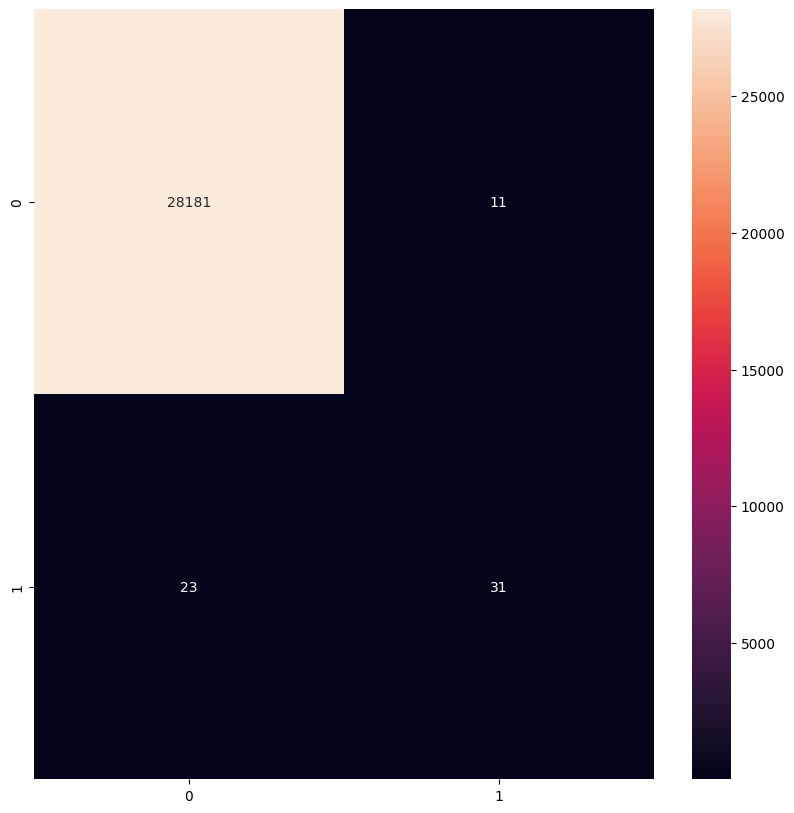

In [29]:
# Make predictions on the test data
pred = lr.predict(X_test)

# Print the classification report
class_report = classification_report(Y_test, pred, target_names=["Class 0", "Class 1"])
print('Classification Report for Logistic Regression:\n', class_report)
print("-" * 100)
print()

# Print precision, recall, and F1 score
precision = precision_score(Y_test, pred)
recall = recall_score(Y_test, pred)
f1 = f1_score(Y_test, pred)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print("-" * 100)
print()

# Print the accuracy score
accuracy = accuracy_score(Y_test, pred)
print('Accuracy Score:', accuracy)
print("-" * 100)
print()

# Plot a confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(Y_test, pred), annot=True, fmt='g')
plt.show()


###*Conclusion*

**Objective:**The primary objective of this project is to build and train a machine learning model for the identification of fraudulent credit card transactions. This includes data preprocessing, addressing class imbalance, and evaluating the model's performance using key metrics like precision, recall, and F1-score.

**Importing Libraries:**Import the necessary libraries for your machine learning project, such as pandas, numpy, matplotlib, seaborn, train_test_split, StandardScaler, SMOTE, RandomUnderSampler, LogisticRegression, RandomForestClassifier, and classification_report.

**Loading Data:**Load the credit card transaction data into your Colab notebook, typically from a CSV file.
Check the data's basic structure and content by displaying the first few rows and checking data types, missing values, and summary statistics.

**Data Preprocessing:** You performed data preprocessing steps, which included normalizing the features and handling class imbalance using SMOTE or RandomUnderSampler.

**Model Selection:** You chose a classification algorithm, such as Logistic Regression or Random Forest, for this task.

**Model Training:** The model was trained on the preprocessed data, considering the class imbalance handling techniques.

**Model Evaluation:** The model's performance was assessed using key metrics like precision, recall, and F1-score. These metrics help in understanding how well the model identifies fraudulent transactions while minimizing false positives.